In [1]:
#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from UsefulFunctions import LinReg
from UsefulFunctions import ScatPlotandReg
from UsefulFunctions import ScatPlotNoReg

# Import Cleaned Data

In [18]:
TCaidAgg_df = pd.read_csv("CleanedData/MedicadeAggregate.csv")
TCareAgg_df = pd.read_csv("CleanedData/MedicareAggregate.csv")
TPHIAgg_df = pd.read_csv("CleanedData/PHIAggregate.csv")


'Personal Health Care (Millions of Dollars)'

# Create graphs for comparison of Medicare, Medicaid, and Private Healthcare

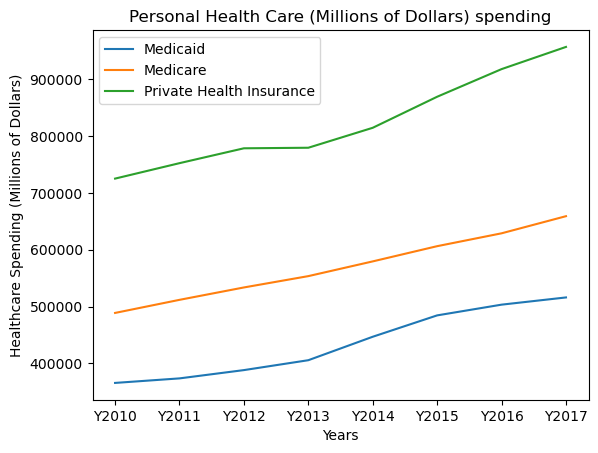

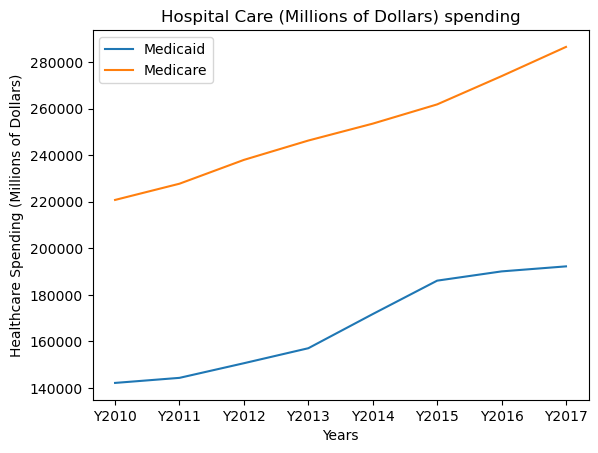

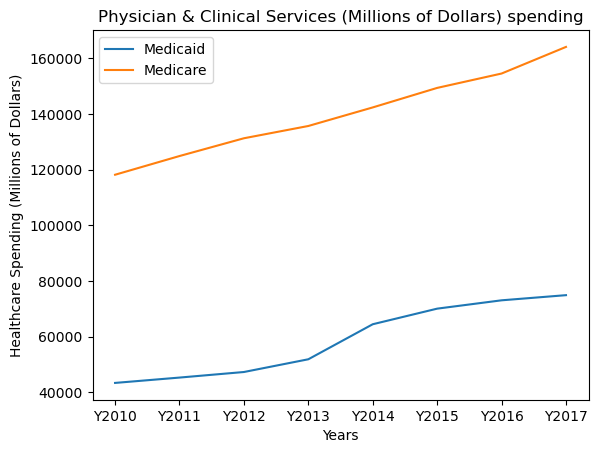

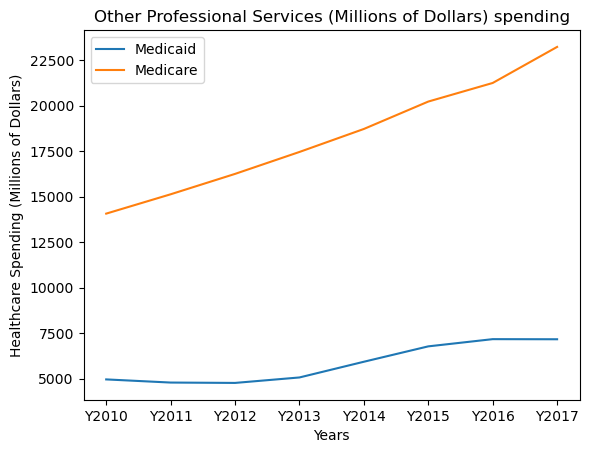

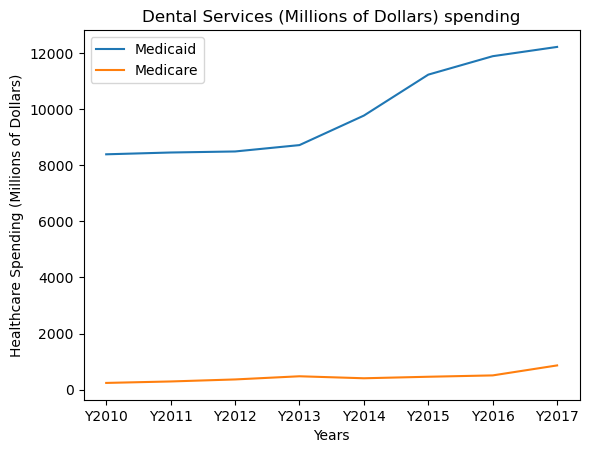

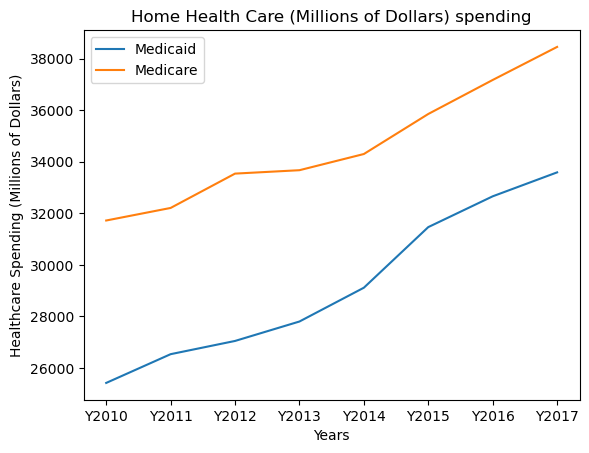

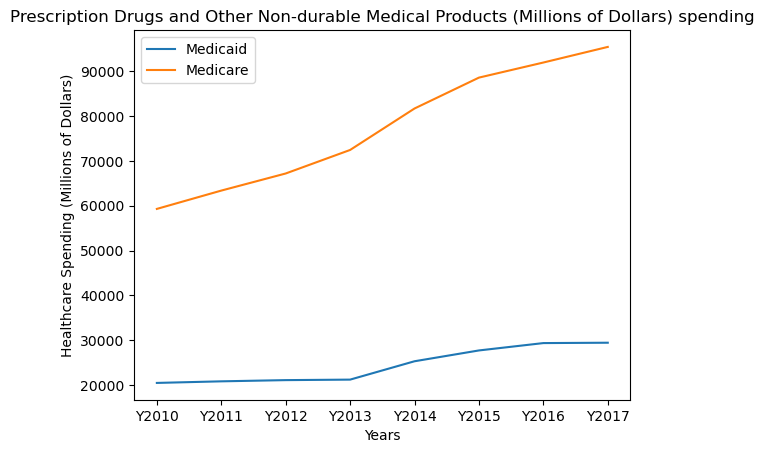

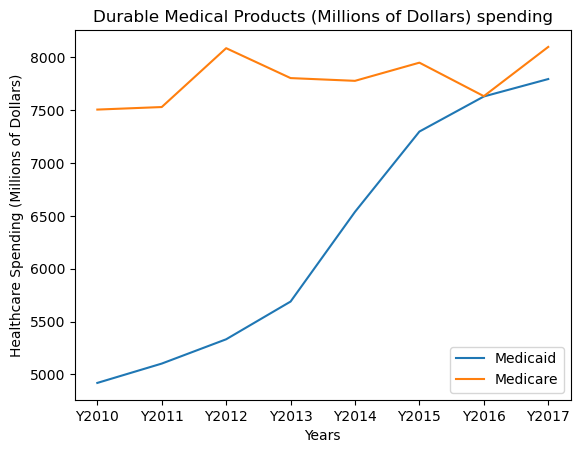

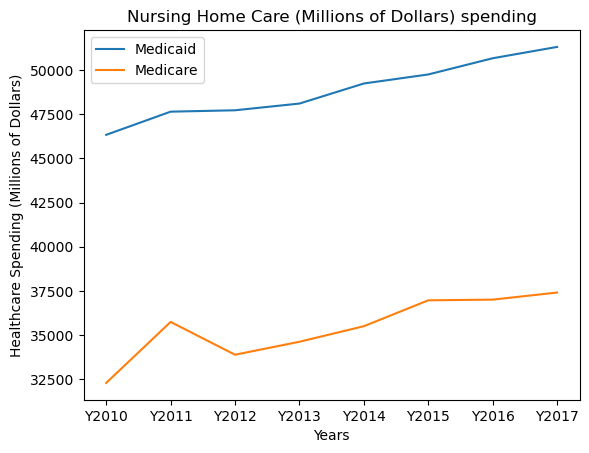

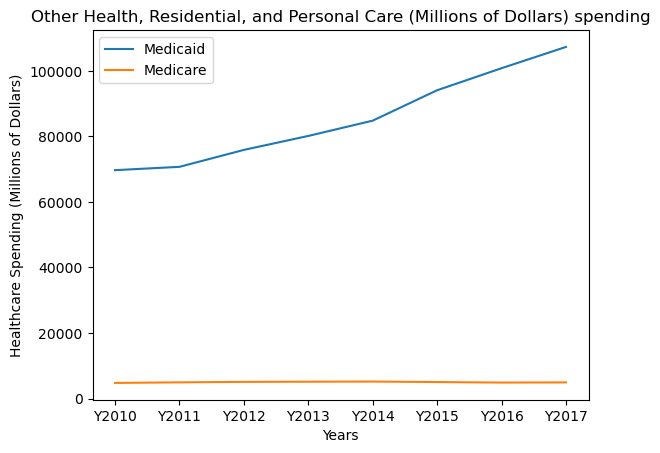

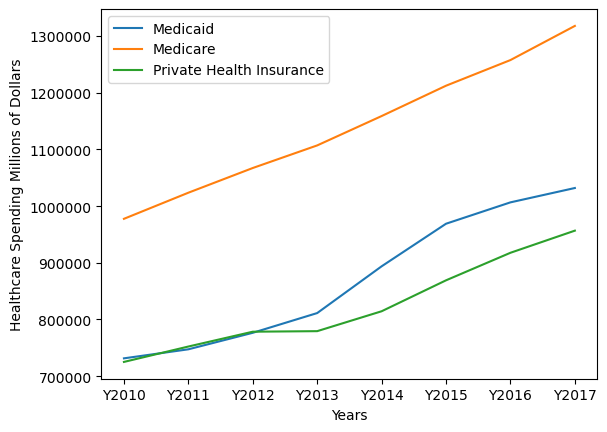

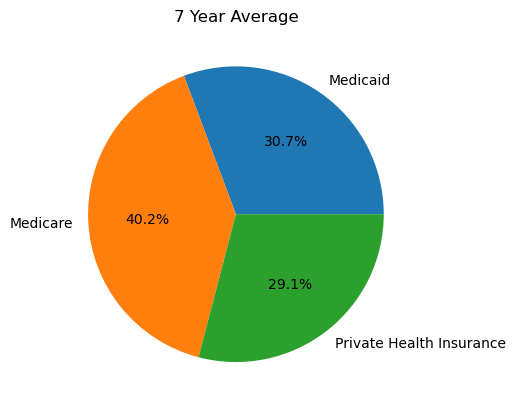

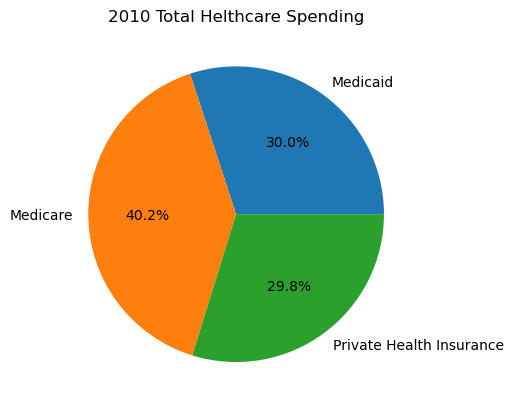

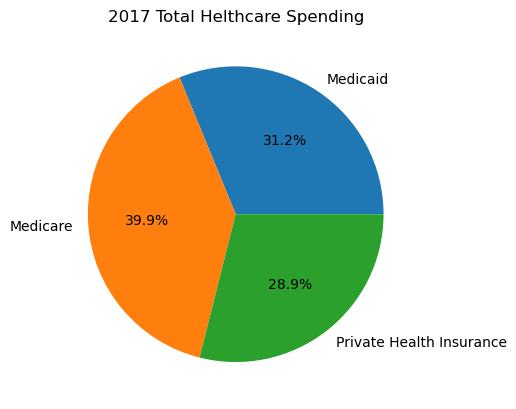

In [24]:
#loop thorugh the codes and print the spending over the years
for x in range(1,11):
    CodeCaidAgg = TCaidAgg_df.loc[TCaidAgg_df['Code']==x]
    CodeCareAgg = TCareAgg_df.loc[TCareAgg_df['Code']==x]
    CodePHIAgg = TPHIAgg_df.loc[TPHIAgg_df['Code']==x]
    wiam = CodeCareAgg['Item'].unique()
    splittext = wiam[0].split('/')
    whatIamgraphing = splittext[1]
    CodeCaidAgg = CodeCaidAgg.sum()
    CodeCareAgg = CodeCareAgg.sum()
    CodePHIAgg = CodePHIAgg.sum()
    CodeCaidAgg =CodeCaidAgg[["Y"+str(x) for x in range(2010,2018)]]
    CodeCareAgg = CodeCareAgg[["Y"+str(x) for x in range(2010,2018)]]
    CodePHIAgg = CodePHIAgg[["Y"+str(x) for x in range(2010,2018)]]
    CodeCaidAgg.plot(kind = 'line',label = 'Medicaid')
    CodeCareAgg.plot(kind = 'line',label = 'Medicare')
    if(x ==1):
        CodePHIAgg.plot(kind = 'line',label = 'Private Health Insurance')
    plt.xlabel("Years")
    plt.ylabel('Healthcare Spending (Millions of Dollars)')
    plt.legend(loc = 'best')
    plt.title(f"{whatIamgraphing} spending")
    whatIamgraphing = whatIamgraphing.replace(" ", "")
    plt.show()
    plt.savefig(f"Graphs/{whatIamgraphing}Spending")
    plt.clf()

#create sums for the pie graphs
SumCaidAgg = TCaidAgg_df.sum()
SumCareAgg = TCareAgg_df.sum()
SumPHIAgg = TPHIAgg_df.sum()
SumCaidAgg = SumCaidAgg[["Y"+str(x) for x in range(2010,2018)]]
SumCareAgg = SumCareAgg[["Y"+str(x) for x in range(2010,2018)]]
SumPHIAgg = SumPHIAgg[["Y"+str(x) for x in range(2010,2018)]]
Caid10YAvg = round(SumCaidAgg.mean(),2)
Care10YAvg = round(SumCareAgg.mean(),2)
PHI10YAvg = round(SumPHIAgg.mean(),2)
#Graph the 3 different types of insurance payments over time.
SumCaidAgg.plot(kind = 'line',label = 'Medicaid')
SumCareAgg.plot(kind = 'line',label = 'Medicare')
SumPHIAgg.plot(kind = 'line',label = 'Private Health Insurance')
plt.xlabel('Years')
plt.ylabel('Healthcare Spending Millions of Dollars')
plt.ticklabel_format(style='plain',axis='y')
plt.legend(loc = 'best')
plt.savefig(f"Graphs/HealthcareSpendingOverTime")
plt.show()

#Pie graph of 3 10 year Averages
plt.pie([Caid10YAvg,Care10YAvg,PHI10YAvg],labels = ["Medicaid","Medicare","Private Health Insurance"],autopct='%1.1f%%')
plt.title('7 Year Average')
plt.savefig(f"Graphs/10YearSpendingAverage")
plt.show()
plt.pie([SumCaidAgg['Y2010'],SumCareAgg['Y2010'],SumPHIAgg['Y2010']],labels = ["Medicaid","Medicare","Private Health Insurance"],autopct='%1.1f%%')
plt.title('2010 Total Helthcare Spending')
plt.savefig(f"Graphs/2010SpendingPercentage")
plt.show()
plt.pie([SumCaidAgg['Y2017'],SumCareAgg['Y2017'],SumPHIAgg['Y2017']],labels = ["Medicaid","Medicare","Private Health Insurance"],autopct='%1.1f%%')
plt.title('2017 Total Helthcare Spending')
plt.savefig(f"Graphs/2020SpendingPercentage")
plt.show()

# Comparison of number of people enrolled in each

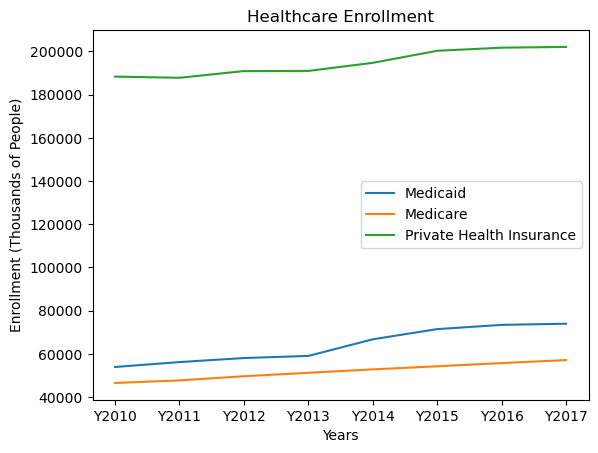

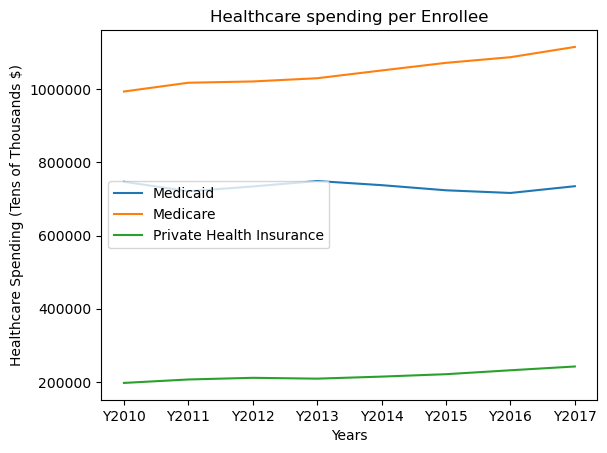

In [25]:
#import relevant enrollment files
CareEnroll = pd.read_csv("CleanedData/MedicareEnroll.csv")
CaidEnroll = pd.read_csv("CleanedData/MedicadeEnroll.csv")
PHIEnroll = pd.read_csv("CleanedData/PHIEnroll.csv")
CarePerEnroll = pd.read_csv("CleanedData/MedicarePerEnroll.csv")
CaidPerEnroll = pd.read_csv("CleanedData/MedicadePerEnroll.csv")
PHIPerEnroll = pd.read_csv("CleanedData/PHIPerEnroll.csv")




#get total enrollment per year
SumCareEnroll = CareEnroll.sum()
SumCaidEnroll = CaidEnroll.sum()
SumPHIEnroll = PHIEnroll.sum()
SumCarePerEnroll = CarePerEnroll.sum()
SumCaidPerEnroll = CaidPerEnroll.sum()
SumPHIPerEnroll = PHIPerEnroll.sum()
SumCareEnroll = SumCareEnroll[["Y"+str(x) for x in range(2010,2018)]]
SumCaidEnroll =SumCaidEnroll[["Y"+str(x) for x in range(2010,2018)]]
SumPHIEnroll = SumPHIEnroll[["Y"+str(x) for x in range(2010,2018)]]
SumCarePerEnroll = SumCarePerEnroll[["Y"+str(x) for x in range(2010,2018)]]
SumCaidPerEnroll = SumCaidPerEnroll[["Y"+str(x) for x in range(2010,2018)]]
SumPHIPerEnroll = SumPHIPerEnroll[["Y"+str(x) for x in range(2010,2018)]]

#Graph the 3 different types of insurance enrollments over time.
SumCaidEnroll.plot(kind = 'line',label = 'Medicaid')
SumCareEnroll.plot(kind = 'line',label = 'Medicare')
SumPHIEnroll.plot(kind = 'line',label = 'Private Health Insurance')
plt.xlabel('Years')
plt.ylabel('Enrollment (Thousands of People)')
plt.title("Healthcare Enrollment")
plt.legend(loc = 'best')
plt.savefig(f"Graphs/HealthcareEnrollmentOverTime")
plt.show()
#Graph the 3 different types of insurance spending per enrollment over time
SumCaidPerEnroll.plot(kind = 'line',label = 'Medicaid')
SumCarePerEnroll.plot(kind = 'line',label = 'Medicare')
SumPHIPerEnroll.plot(kind = 'line',label = 'Private Health Insurance')
plt.xlabel('Years')
plt.ylabel('Healthcare Spending (Tens of Thousands $)')
plt.ticklabel_format(style='plain',axis='y')
plt.legend(loc = 'best')
plt.title("Healthcare spending per Enrollee")
plt.savefig(f"Graphs/HealthcareSpendingPerEnrolleeOverTime")
plt.show()



# Spending per code per enrollee

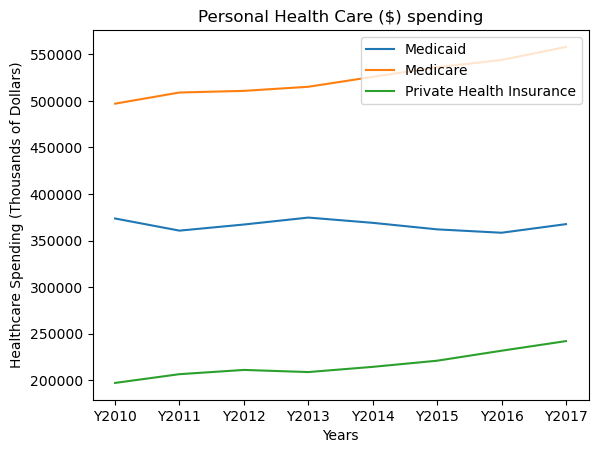

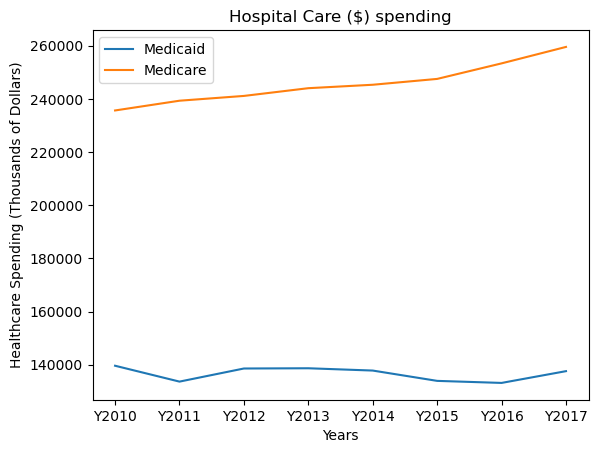

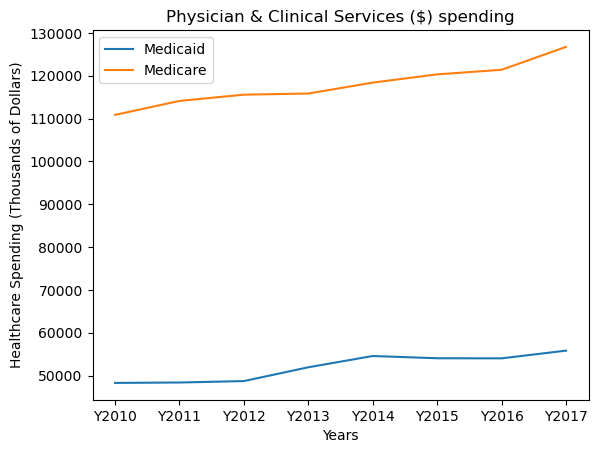

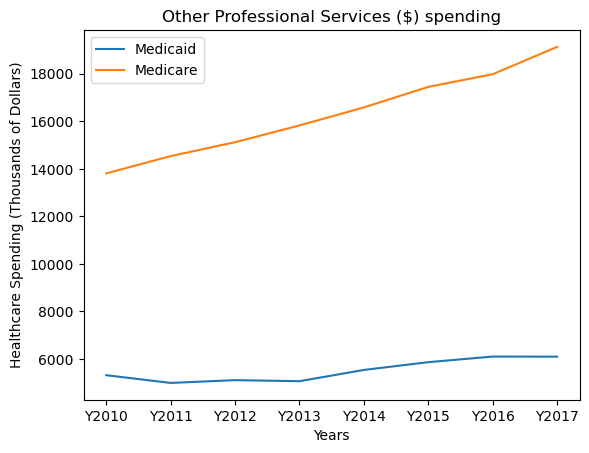

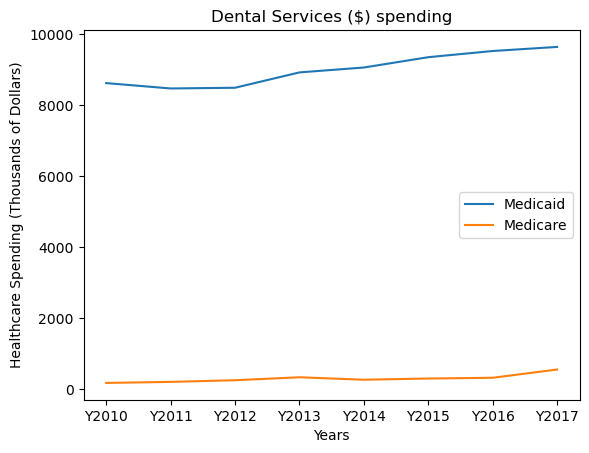

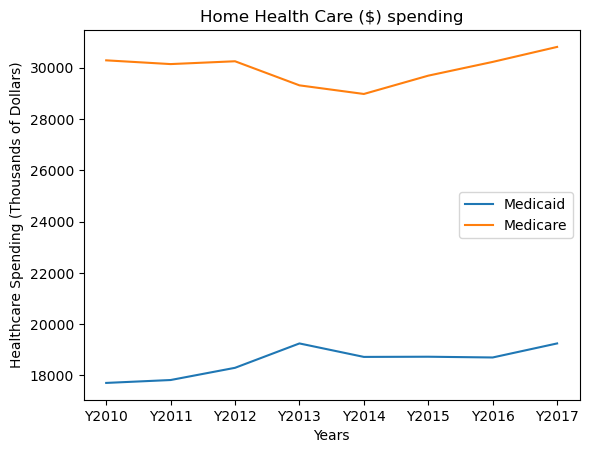

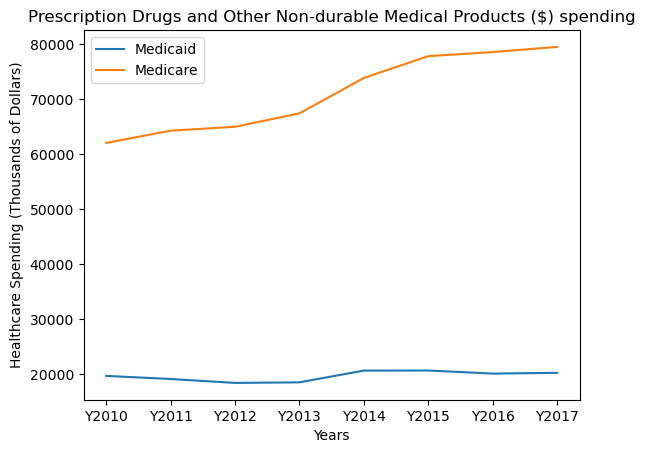

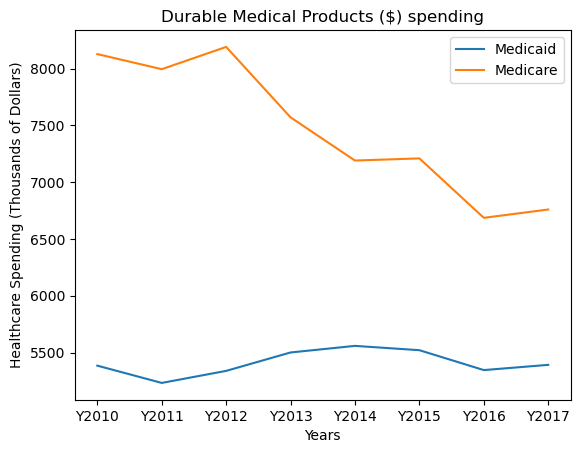

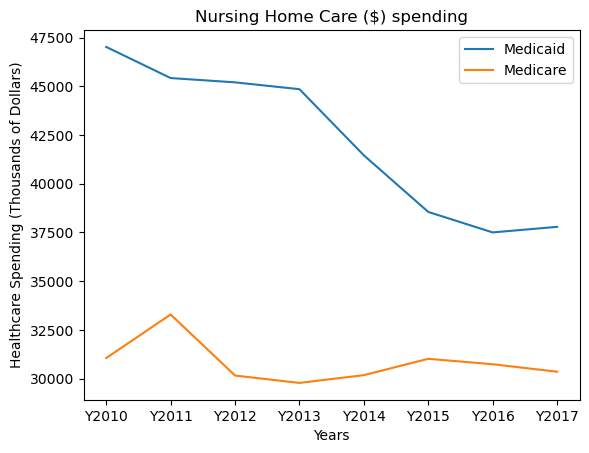

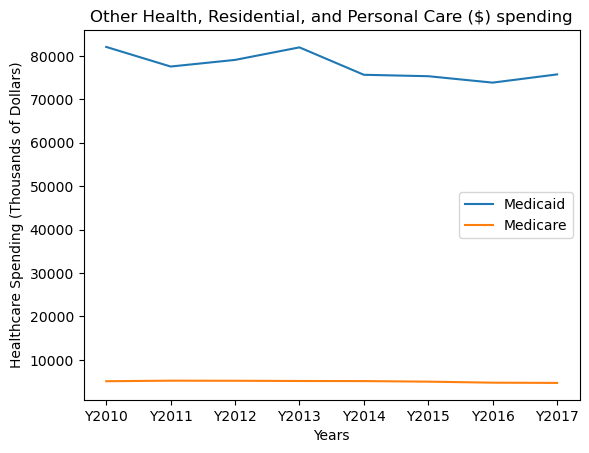

<Figure size 640x480 with 0 Axes>

In [3]:
#import data
CarePerEnroll = pd.read_csv("CleanedData/MedicarePerEnroll.csv")
CaidPerEnroll = pd.read_csv("CleanedData/MedicadePerEnroll.csv")
PHIPerEnroll = pd.read_csv("CleanedData/PHIPerEnroll.csv")

#loop through the codes
for x in range(1,11):
    CodeCaidAgg = CaidPerEnroll.loc[CaidPerEnroll['Code']==x]
    CodeCareAgg = CarePerEnroll.loc[CarePerEnroll['Code']==x]
    CodePHIAgg = PHIPerEnroll.loc[PHIPerEnroll['Code']==x]
    wiam = CodeCareAgg['Item'].unique()
    splittext = wiam[0].split('/')
    whatIamgraphing = splittext[1]
    CodeCaidAgg = CodeCaidAgg.sum()
    CodeCareAgg = CodeCareAgg.sum()
    CodePHIAgg = CodePHIAgg.sum()
    CodeCaidAgg =CodeCaidAgg[["Y"+str(x) for x in range(2010,2018)]]
    CodeCareAgg = CodeCareAgg[["Y"+str(x) for x in range(2010,2018)]]
    CodePHIAgg = CodePHIAgg[["Y"+str(x) for x in range(2010,2018)]]
    CodeCaidAgg.plot(kind = 'line',label = 'Medicaid')
    CodeCareAgg.plot(kind = 'line',label = 'Medicare')
    if(x ==1):
        CodePHIAgg.plot(kind = 'line',label = 'Private Health Insurance')
    plt.xlabel("Years")
    plt.ylabel('Healthcare Spending (Thousands of Dollars)')
    plt.legend(loc = 'best')
    plt.title(f"{whatIamgraphing} spending")
    whatIamgraphing = whatIamgraphing.replace(" ", "")
    plt.show()
    plt.savefig(f"Graphs/{whatIamgraphing}SpendingPerEnrollee")
    plt.clf()


There is an increase of spending over time however the amount of spending per person has not increased by as much meaning that the increase is more likely related to population than the price of the insurance.